# Computer Vision : Vision par ordinateur

La vision par ordinateur, ou computer vision en anglais, est un domaine de l'informatique qui se concentre sur le développement de systèmes capables d'interpréter, comprendre et extraire des informations à partir d'images ou de séquences d'images. L'objectif est de permettre aux machines de "voir" le monde de la manière dont les humains le font.

Les tâches de vision par ordinateur incluent
- la reconnaissance d'objets,
- la détection de motifs,
- la segmentation d'images,
- la suivi d'objets en mouvement,
- la reconnaissance faciale, et bien d'autres.

Les **réseaux de neurones convolutionnels** (CNN) sont couramment utilisés dans le cadre de l'apprentissage profond pour la vision par ordinateur. Ces réseaux sont entraînés sur de grandes quantités de données pour apprendre automatiquement à extraire des caractéristiques utiles à partir d'images.

**1. Multi layer Perceptron (Réseau de neurone profond)**

Pour rappel, un réseau de neurones est un modèle mathématique qui s'inspire du fonctionnement du cerveau humain, Il est composé de neurones artificiels organisés en couches :
- Chaque neurone est connecté à tous les neurones de la couche suivante,
- chaque connexion est associée à un poids. Lorsque le réseau est activé,
- les neurones sont activés les uns après les autres, de la couche d'entrée à la couche de sortie,
- l'activation d'un neurone est calculée à partir de la somme pondérée des activations des neurones de la couche précédente. Cette somme est ensuite transformée par une fonction d'activation.

In [ ]:
# Conception d'un réseau de neuronne
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model = Sequential()

model.add(Dense(units=25, input_dim=25))

model.add(Dense(units=2,activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam',metrics='mse', loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                650       
                                                                 
 dense_1 (Dense)             (None, 2)                 52        
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 705 (2.75 KB)
Trainable params: 705 (2.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

# Entrainement du modèle
#model.fit(X_train,y_train, batch_size=5, epochs=1000, validation_data=(X_test, y_test), callbacks=[early_stop])

# Prédiction du modèle avec des données aléatoires
model.predict(np.array([np.random.random(25)]))

1/1 [==============================] - 1s 1s/step


array([[0.44085822]], dtype=float32)

**2. Convolutional Neural Networks**
Les **Convolutional Neural Networks** (CNN), ou Réseaux de Neurones Convolutifs, sont une classe spécifique de réseaux de neurones profonds qui repose sur la construction d'un réseau de neurones à partir de couches de convolution. Les CNN sont couramment utilisés dans le cadre de l'apprentissage profond pour la vision par ordinateur. Ces réseaux sont entraînés sur de grandes quantités de données pour apprendre automatiquement à extraire des caractéristiques utiles à partir d'images.

**Qu'est-ce qu'une couche de convolution ?**

Une couche de convolution est une couche de neurones qui effectue une opération de convolution. Cette opération consiste à appliquer un filtre à une image. Le filtre est une matrice de nombres qui est appliquée à l'image en déplaçant le filtre sur l'image, pixel par pixel. Le filtre est appliqué à chaque pixel de l'image, et le résultat est une nouvelle image qui met en évidence les caractéristiques importantes de l'image d'origine.


<img src='https://upload.wikimedia.org/wikipedia/commons/1/19/2D_Convolution_Animation.gif'>
<img src='https://miro.medium.com/v2/resize:fit:1358/0*o1hzsn9r_wsVyqXz' width=650>
<img src='https://miro.medium.com/v2/resize:fit:1400/format:webp/0*A2bDrObjDXjNgLR2'width=650>


[Plusieurs filtres](https://fr.wikipedia.org/wiki/Noyau_(traitement_d%27image)) peuvent être appliqués à une image pour créer plusieurs images de caractéristiques. Ces images de caractéristiques sont ensuite utilisées comme entrée pour la couche suivante du réseau de neurones.


## 1. Observation du jeu de données / Cat and Dog Classification

<img src='https://storage.googleapis.com/kaggle-media/competitions/kaggle/3362/media/woof_meow.jpg'>

Entrainement d'un modèle de classification de chats et de chiens à partir de zéro via le jeu de données Kaggle : https://www.kaggle.com/c/dogs-vs-cats

In [ ]:
import tensorflow.keras

In [ ]:
# Téléchargement du jeu de données
!git clone https://github.com/Quera-fr/Cat-Dog-Dataset

Cloning into 'Cat-Dog-Dataset'...
remote: Enumerating objects: 24842, done.
remote: Total 24842 (delta 0), reused 0 (delta 0), pack-reused 24842
Receiving objects: 100% (24842/24842), 537.60 MiB | 35.72 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Updating files: 100% (24844/24844), done.


In [ ]:
import os
path = 'Cat-Dog-Dataset/train/'
list_dir = os.listdir(path)
len(list_dir)

19844

In [ ]:
os.listdir('./Cat-Dog-Dataset/train')

['cat.578.jpg',
 'dog.10697.jpg',
 'dog.6332.jpg',
 'cat.7097.jpg',
 'cat.8006.jpg',
 'cat.2689.jpg',
 'cat.6774.jpg',
 'dog.608.jpg',
 'dog.8100.jpg',
 'dog.499.jpg',
 'dog.6637.jpg',
 'dog.12115.jpg',
 'dog.257.jpg',
 'cat.4537.jpg',
 'dog.4741.jpg',
 'dog.784.jpg',
 'cat.1151.jpg',
 'dog.288.jpg',
 'dog.6423.jpg',
 'cat.11013.jpg',
 'cat.11191.jpg',
 'cat.10825.jpg',
 'cat.10103.jpg',
 'cat.623.jpg',
 'cat.3419.jpg',
 'cat.2952.jpg',
 'dog.2957.jpg',
 'cat.5361.jpg',
 'cat.543.jpg',
 'cat.10879.jpg',
 'cat.9575.jpg',
 'dog.11130.jpg',
 'dog.7592.jpg',
 'cat.1845.jpg',
 'cat.5428.jpg',
 'dog.6180.jpg',
 'dog.12217.jpg',
 'dog.10602.jpg',
 'cat.10069.jpg',
 'cat.7257.jpg',
 'dog.406.jpg',
 'dog.9797.jpg',
 'dog.11208.jpg',
 'cat.7754.jpg',
 'dog.9460.jpg',
 'cat.7340.jpg',
 'dog.683.jpg',
 'cat.1104.jpg',
 'dog.10656.jpg',
 'cat.7988.jpg',
 'cat.250.jpg',
 'cat.1100.jpg',
 'dog.11090.jpg',
 'cat.7800.jpg',
 'cat.345.jpg',
 'dog.9422.jpg',
 'dog.5758.jpg',
 'dog.2204.jpg',
 'cat.11732.

In [ ]:
import pandas as pd

# Créez un DataFrame avec les noms des images et les labels correspondants
df = pd.DataFrame(os.listdir('Cat-Dog-Dataset/train'), columns=['filename'])
df['label'] = ['1' if 'cat' in name else '0' for name in df['filename']]
df

filename label
0        cat.578.jpg     1
1      dog.10697.jpg     0
2       dog.6332.jpg     0
3       cat.7097.jpg     1
4       cat.8006.jpg     1
...              ...   ...
19839  dog.11225.jpg     0
19840   dog.8150.jpg     0
19841  dog.12167.jpg     0
19842   dog.7299.jpg     0
19843  dog.12276.jpg     0

[19844 rows x 2 columns]

In [ ]:
import pandas as pd

# Créez un DataFrame avec les noms des images et les labels correspondants
df_val = pd.DataFrame(os.listdir('Cat-Dog-Dataset/validation'), columns=['filename'])
df_val['label'] = ['1' if 'cat' in name else '0' for name in df_val['filename']]
df_val

filename label
0      dog.1551.jpg     0
1     dog.11705.jpg     0
2      cat.7476.jpg     1
3      dog.8763.jpg     0
4      dog.7640.jpg     0
...             ...   ...
4995  cat.12020.jpg     1
4996   cat.2861.jpg     1
4997   cat.2109.jpg     1
4998   cat.3363.jpg     1
4999   dog.9487.jpg     0

[5000 rows x 2 columns]

In [ ]:
# Répartion des labels dans le jeu d'entrainement
df.label.value_counts()

label
1    10008
0     9836
Name: count, dtype: int64

In [ ]:
# Répartion des labels dans le jeu d'entrainement
df_val.label.value_counts()

label
0    2508
1    2492
Name: count, dtype: int64

In [ ]:
# Colonne contenant le nom des images
df.filename

0          cat.578.jpg
1        dog.10697.jpg
2         dog.6332.jpg
3         cat.7097.jpg
4         cat.8006.jpg
             ...      
19839    dog.11225.jpg
19840     dog.8150.jpg
19841    dog.12167.jpg
19842     dog.7299.jpg
19843    dog.12276.jpg
Name: filename, Length: 19844, dtype: object

In [ ]:
import tensorflow

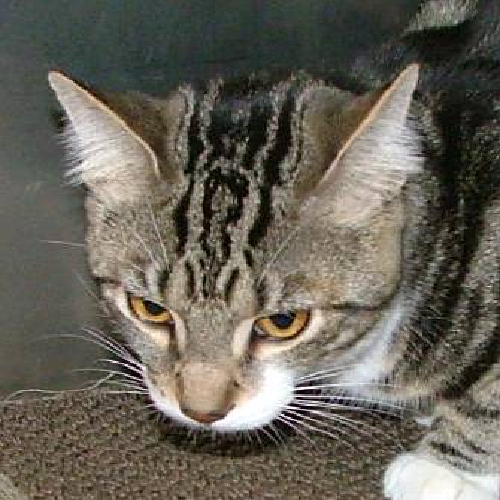

In [ ]:
from tensorflow.keras.preprocessing import image

path = 'Cat-Dog-Dataset/train/'

# Affichage d'une image
img = image.load_img(path+df.filename[45], target_size=(500, 500))
img

In [ ]:
image.img_to_array(img).max()

255.0

In [ ]:
image_1 = image.img_to_array(img)
image_1.max()

255.0

In [ ]:
image_1/255

array([[[0.28235295, 0.30980393, 0.33333334],
        [0.2901961 , 0.31764707, 0.34117648],
        [0.2901961 , 0.31764707, 0.34117648],
        ...,
        [0.18431373, 0.22352941, 0.1882353 ],
        [0.18431373, 0.22352941, 0.1882353 ],
        [0.1882353 , 0.22745098, 0.19215687]],

       [[0.2784314 , 0.30588236, 0.32941177],
        [0.28627452, 0.3137255 , 0.3372549 ],
        [0.28627452, 0.3137255 , 0.3372549 ],
        ...,
        [0.19607843, 0.22352941, 0.19215687],
        [0.19607843, 0.22352941, 0.19215687],
        [0.19607843, 0.23529412, 0.2       ]],

       [[0.2784314 , 0.30588236, 0.32941177],
        [0.28627452, 0.3137255 , 0.3372549 ],
        [0.28627452, 0.3137255 , 0.3372549 ],
        ...,
        [0.19607843, 0.22352941, 0.19215687],
        [0.19607843, 0.22352941, 0.19215687],
        [0.19607843, 0.23529412, 0.2       ]],

       ...,

       [[0.45882353, 0.43137255, 0.32941177],
        [0.49019608, 0.4627451 , 0.36078432],
        [0.49019608, 0

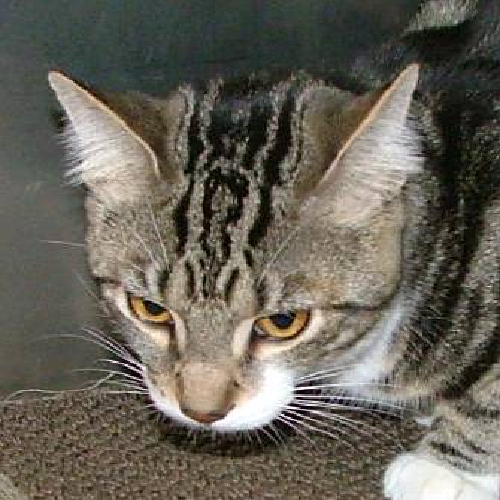

In [ ]:
image_1/255
image.array_to_img(image_2)

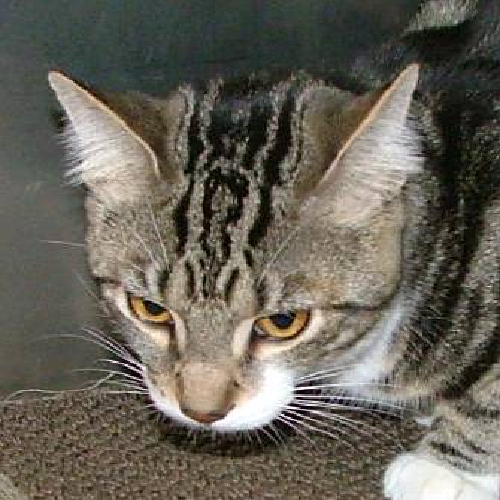

In [ ]:
image_2 = image_1/255
image.array_to_img(image_2)

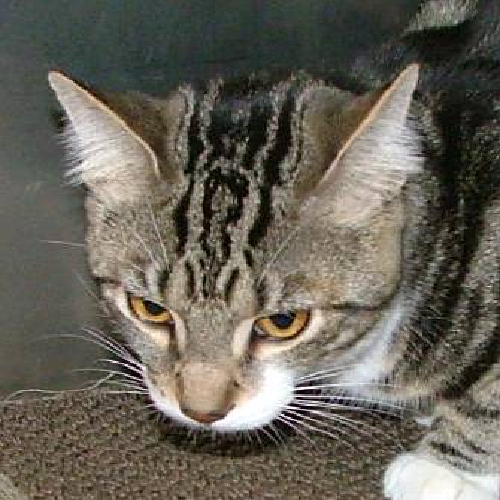

In [ ]:
def show_img(n_img, return_img=False, path='Cat-Dog-Dataset/train/', size=(500, 500)):
    # Affichage de l'image
    img = image.load_img(path+df.filename[n_img], target_size=size)
    if return_img:
        return image.img_to_array(img)
    else:
        return img

image_1 = show_img(0, return_img=True)
show_img(45)

## 2. Conception d'un modèle CNN

Un modèle CNN possède une architecture composée de couches de convolution, de couches de pooling et de couches entièrement connectées (fully connected layers) :

- Les couches **MaxPooling2D** effectuent un sous-échantillonnage de l'image d'entrée en prenant la valeur maximale de chaque région de la fenêtre.

- Les couches **Conv2D** sont des couches de convolution qui filtrent les caractéristiques de l'image d'entrée. Elles sont suivies de couches d'activation ReLU qui introduisent de la non-linéarité dans le modèle.

- Les couches **Flatten** convertissent les images en vecteurs afin qu'elles puissent être traitées par les couches entièrement connectées.

- Les couches **Dense** sont des couches entièrement connectées qui effectuent une classification en utilisant la fonction d'activation softmax.

- Les couches **Dropout** sont des couches de régularisation qui permettent de réduire le surapprentissage du modèle (overfitting) en déconnectant aléatoirement certains neurones du réseau pendant l'entraînement.

<img src='https://miro.medium.com/max/1400/1*vkQ0hXDaQv57sALXAJquxA.jpeg'>

In [ ]:
500*3*500

750000

## **1. Couche de convolution MaxPooling**

In [ ]:
# Couche de convolution MaxPooling
import numpy as np
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.models import Sequential

In [ ]:
model_maxpooling = Sequential()


model_maxpooling.add(MaxPool2D(pool_size=(4,4), input_shape=(500,500,3)))

model_maxpooling.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 max_pooling2d (MaxPooling2  (None, 125, 125, 3)       0         
 D)                                                              
                                                                 
Total params: 0 (0.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1/1 [==============================] - 0s 412ms/step
Dimension de l'image (125, 125, 3)


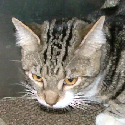

In [ ]:
image_out = model_maxpooling.predict(np.array([image_2]))[0]

print("Dimension de l'image", image_out.shape)
image.array_to_img(image_out/255)

## **2. Couche de convolution Conv2D**

In [ ]:
# Couche torflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D

model_cov2d = Sequential()
model_cov2d.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(500,500,3), activation='relu'))

image_out = model_cov2d.predict(np.array([image_2]))

image_out[0].shape

1/1 [==============================] - 0s 86ms/step


(498, 498, 32)

In [ ]:
model_cov2d.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 498, 498, 32)      896       
                                                                 
Total params: 896 (3.50 KB)
Trainable params: 896 (3.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
len(model_cov2d.weights)

2

In [ ]:
model_cov2d.weights[0].shape

TensorShape([3, 3, 3, 32])

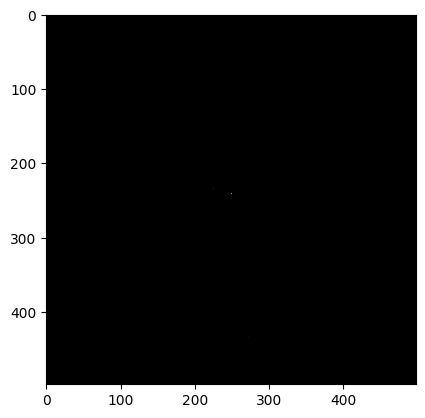

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(np.transpose(image_out[0], (2,0,1))[25], cmap='gray')

### **3. Couche de convolution Flatten**

In [ ]:
# Couches de convolution Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model_flatten = Sequential()
model_flatten.add(Flatten(input_shape=(500,500,3)))

image_out = model_flatten.predict(np.array([image_1]))

image_out.shape

1/1 [==============================] - 0s 37ms/step


(1, 750000)

### Création d'un modèle CNN

In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

# Conception d'un modèle de réseau de neuronne à convolution
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(250, 250, 3)),
    Dropout(0.4),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    Dropout(0.4),
    MaxPooling2D((2, 2)),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    Dropout(0.4),
    Flatten(),

    Dense(units=32, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

# Compilation du modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Affichage de la structure du modèle
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 248, 248, 32)      896       
                                                                 
 dropout (Dropout)           (None, 248, 248, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 124, 124, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 dropout_1 (Dropout)         (None, 122, 122, 64)      0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 61, 61, 64)        0         
 g2D)                                                 

In [ ]:
img = image.load_img(path+df.filename[0], target_size=(250, 250))

model.predict(image.img_to_array(img).reshape(1,250,250,3))

1/1 [==============================] - 1s 611ms/step


array([[5.577119e-14]], dtype=float32)

## 3. Entrainement du modèle

In [ ]:
df

filename label
0        cat.578.jpg     1
1      dog.10697.jpg     0
2       dog.6332.jpg     0
3       cat.7097.jpg     1
4       cat.8006.jpg     1
...              ...   ...
19839  dog.11225.jpg     0
19840   dog.8150.jpg     0
19841  dog.12167.jpg     0
19842   dog.7299.jpg     0
19843  dog.12276.jpg     0

[19844 rows x 2 columns]

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Créez un générateur d'images à partir du DataFrame
datagen = ImageDataGenerator(rescale=1./255)  # Rééchelonne les valeurs des pixels entre 0 et 1

# Générateur d'images à partir du DataFrame
generator = datagen.flow_from_dataframe(
    dataframe=df[:5000],
    directory=path,
    x_col='filename',
    y_col='label',
    target_size=(250, 250),
    class_mode='binary',
    batch_size=32
)

generator_val = datagen.flow_from_dataframe(
    dataframe=df_val[:100],
    directory='Cat-Dog-Dataset/validation/',
    x_col='filename',
    y_col='label',
    target_size=(250, 250),
    class_mode='binary',
    batch_size=32
)


# Entraînez le modèle en utilisant le générateur d'images
history = model.fit(generator, epochs=10,validation_data=generator_val)

Found 5000 validated image filenames belonging to 2 classes.
Found 100 validated image filenames belonging to 2 classes.
Epoch 1/10
157/157 [==============================] - 25s 128ms/step - loss: 0.8718 - accuracy: 0.5528 - val_loss: 0.6806 - val_accuracy: 0.5900
Epoch 2/10
157/157 [==============================] - 18s 112ms/step - loss: 0.6341 - accuracy: 0.6272 - val_loss: 0.6644 - val_accuracy: 0.5800
Epoch 3/10
157/157 [==============================] - 18s 117ms/step - loss: 0.5816 - accuracy: 0.6924 - val_loss: 0.6742 - val_accuracy: 0.5500
Epoch 4/10
157/157 [==============================] - 18s 111ms/step - loss: 0.5018 - accuracy: 0.7538 - val_loss: 0.5805 - val_accuracy: 0.7800
Epoch 5/10
157/157 [==============================] - 18s 113ms/step - loss: 0.3985 - accuracy: 0.8172 - val_loss: 0.5810 - val_accuracy: 0.7100
Epoch 6/10
157/157 [==============================] - 18s 112ms/step - loss: 0.2624 - accuracy: 0.8852 - val_loss: 0.6043 - val_accuracy: 0.7100
Epoch 7/1

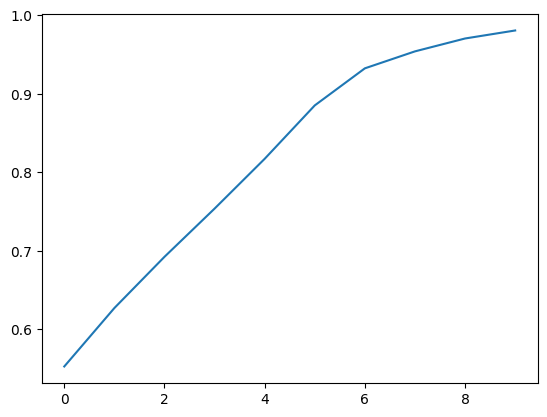

In [ ]:
plt.plot(history.history['accuracy'])

In [ ]:
model.fit(generator, epochs=10,validation_data=generator_val)

Epoch 1/10
157/157 [==============================] - 19s 120ms/step - loss: 0.7434 - accuracy: 0.5090 - val_loss: 0.6936 - val_accuracy: 0.4900
Epoch 2/10
157/157 [==============================] - 19s 120ms/step - loss: 0.6932 - accuracy: 0.5036 - val_loss: 0.6935 - val_accuracy: 0.4900
Epoch 3/10
157/157 [==============================] - 18s 115ms/step - loss: 0.6932 - accuracy: 0.5036 - val_loss: 0.6933 - val_accuracy: 0.4900
Epoch 4/10
157/157 [==============================] - 18s 111ms/step - loss: 0.6932 - accuracy: 0.5036 - val_loss: 0.6934 - val_accuracy: 0.4900
Epoch 5/10
157/157 [==============================] - 18s 112ms/step - loss: 0.6932 - accuracy: 0.5036 - val_loss: 0.6933 - val_accuracy: 0.4900
Epoch 6/10
157/157 [==============================] - 18s 113ms/step - loss: 0.6931 - accuracy: 0.5036 - val_loss: 0.6933 - val_accuracy: 0.4900
Epoch 7/10
157/157 [==============================] - 18s 111ms/step - loss: 0.6932 - accuracy: 0.5036 - val_loss: 0.6932 - val_ac

(250, 250, 3)
1/1 [==============================] - 0s 93ms/step


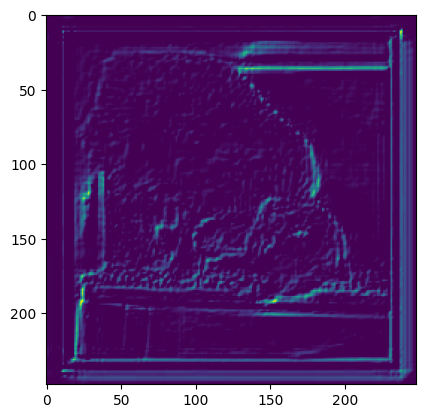

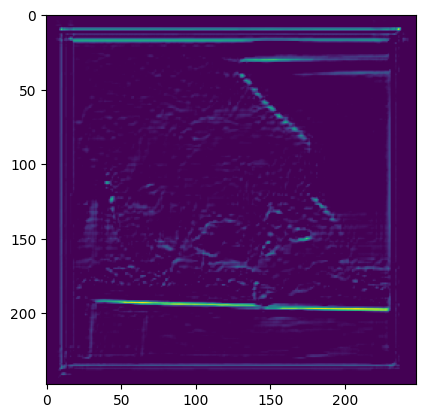

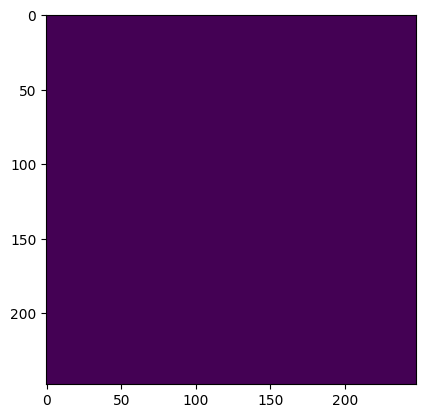

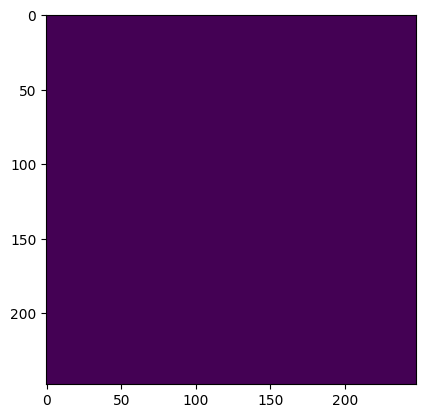

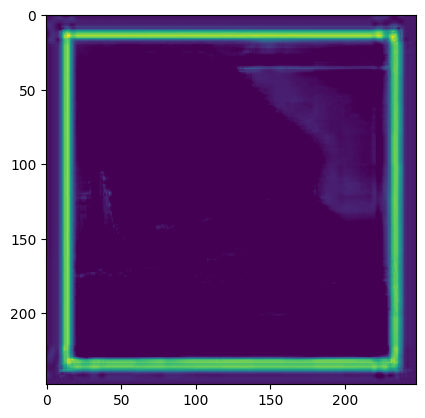

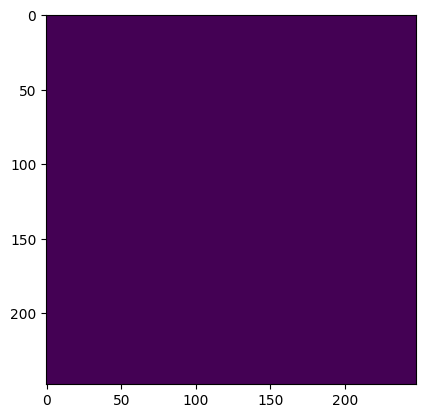

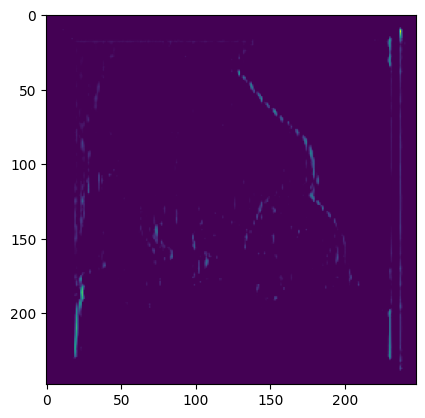

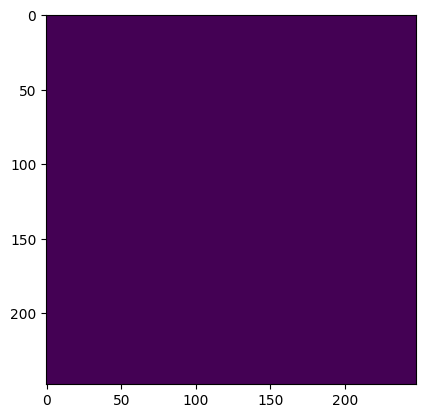

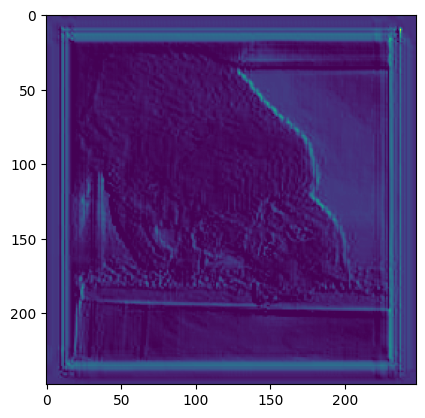

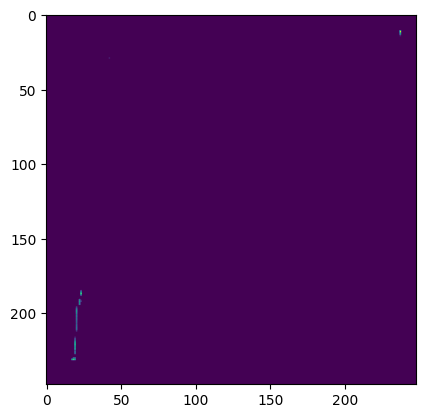

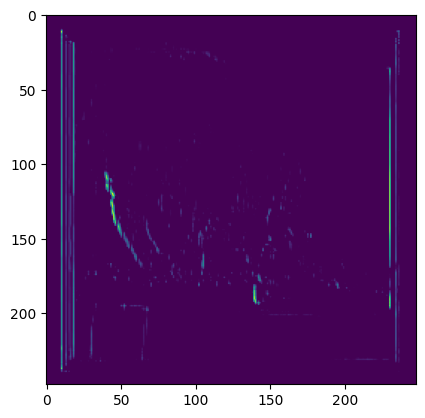

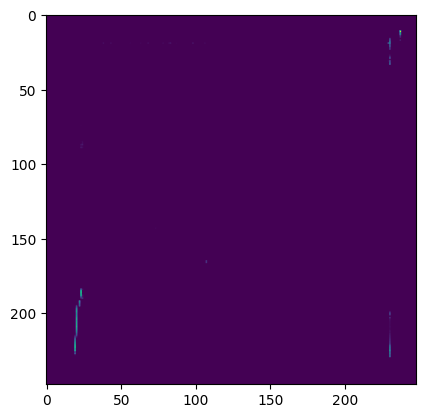

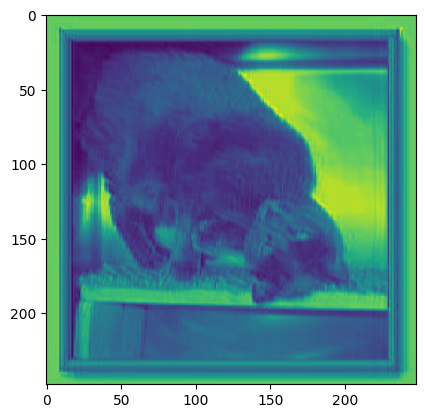

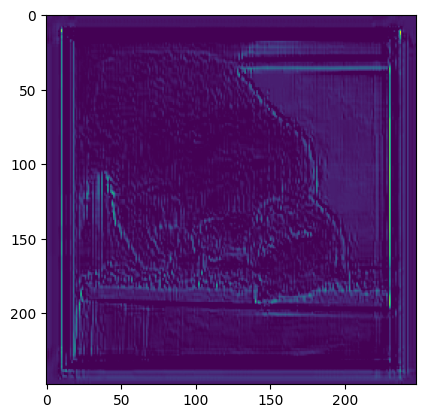

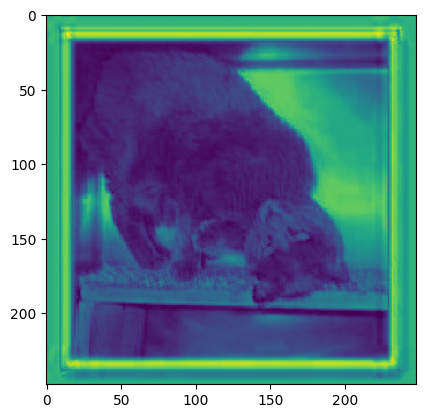

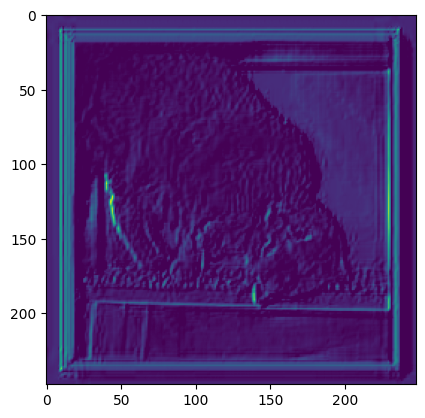

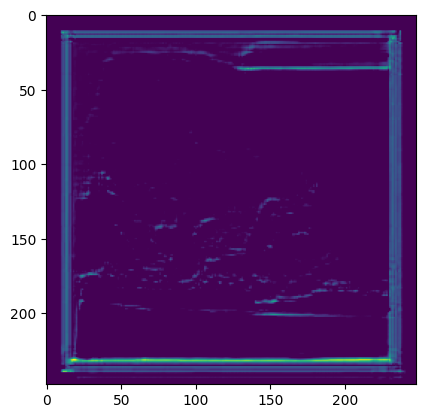

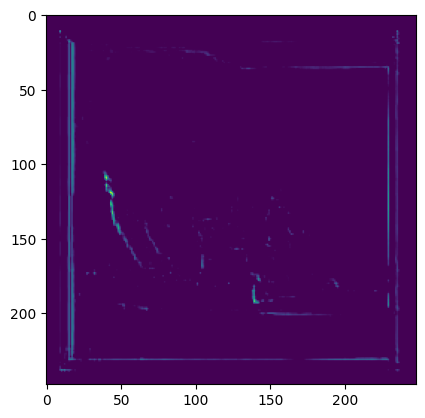

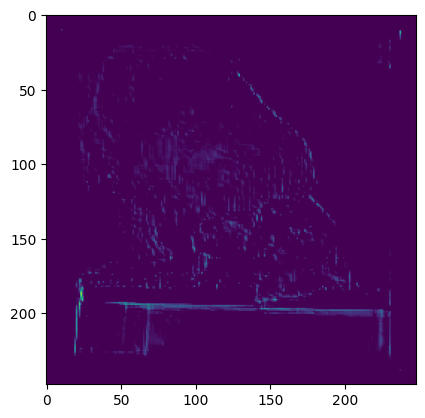

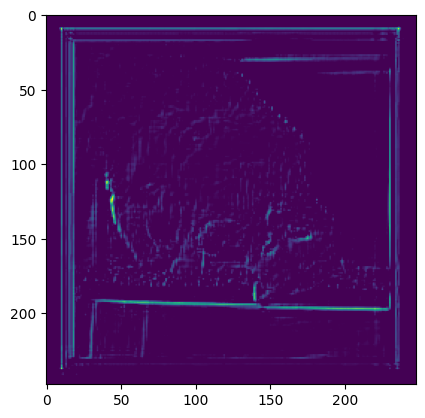

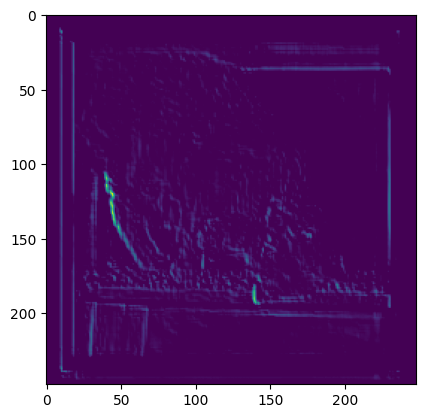

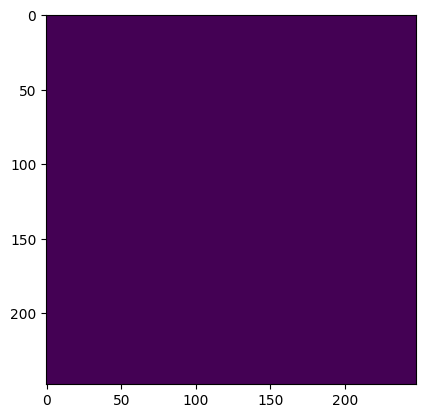

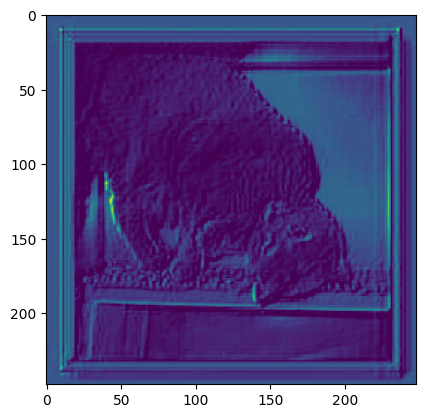

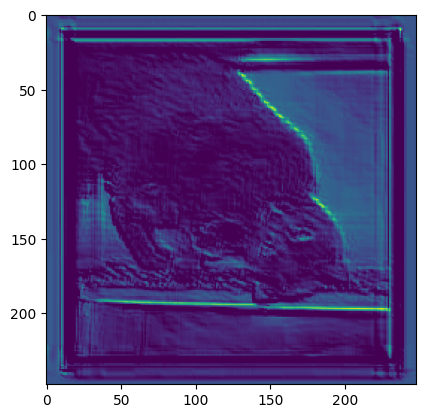

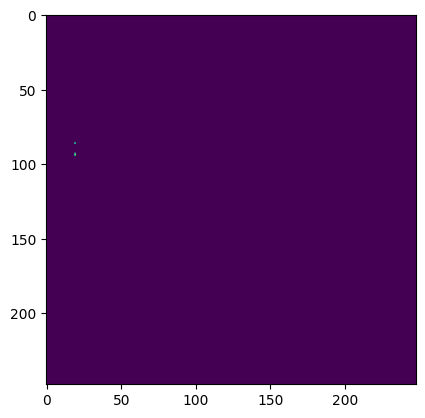

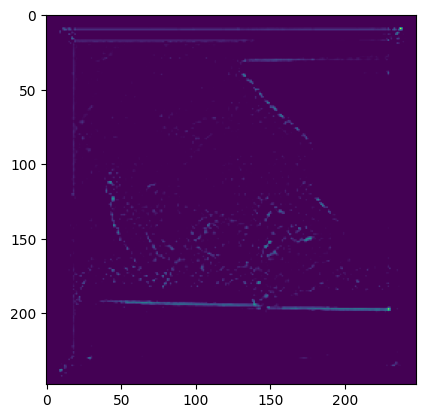

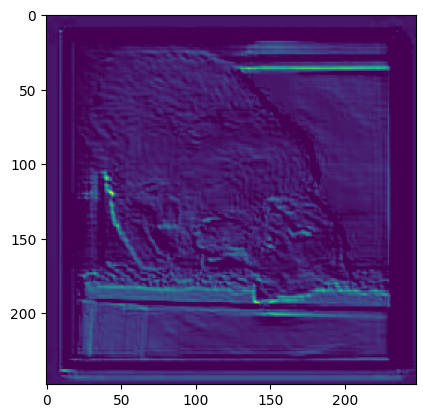

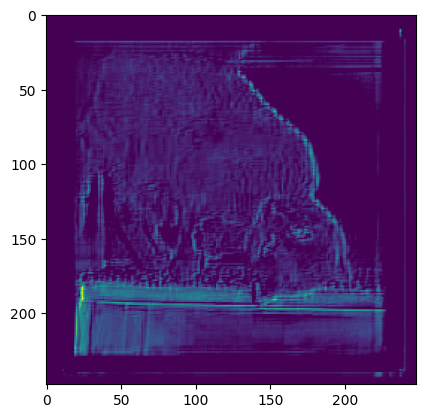

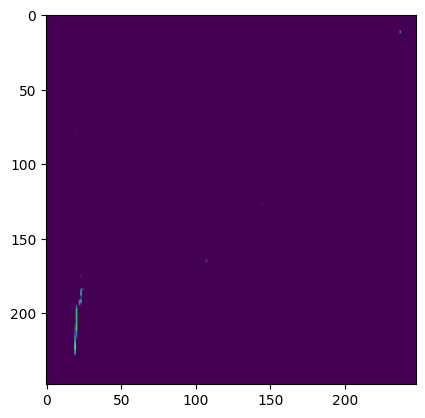

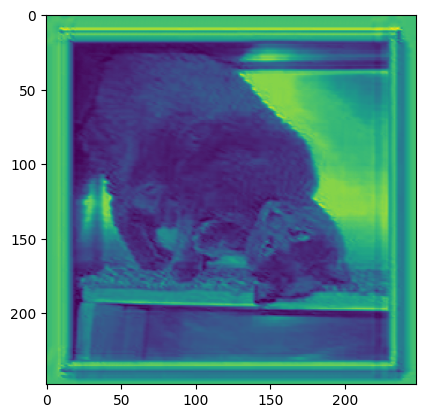

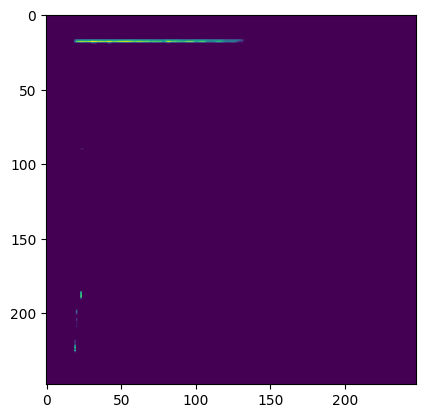

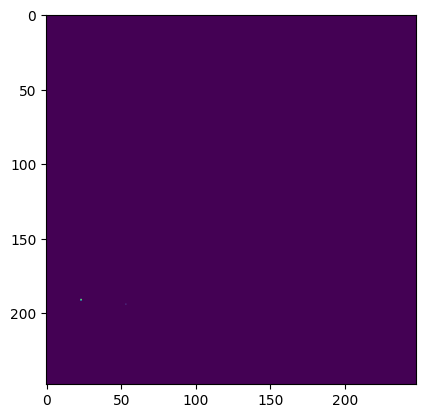

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Conv2D après entrainement
conv2d = model.layers[0]

# Création d'un nouveau modèle Sequential
model_conv2d = Sequential()

# Ajout de la couche Conv2d au modèle
model_conv2d.add(conv2d)

# Import d'une image
img = show_img(0, True, size=(250,250))
print(img.shape)

# Prédiction de la couche conv2d
img_filtres = model_conv2d.predict(np.array([img]))

for n in range(32): # Affichage des filtres
  plt.imshow(np.transpose(img_filtres[0], (2,0,1))[n]) # avec permutation des colonnes
  plt.show()

In [ ]:
model.save('model.h5')

# 4. Transfer Learning : ResNet50

Dans cette partie, nous allons utiliser le modèle ResNet50 pré-entraîné pour la classification d'images. ResNet50 est un modèle CNN pré-entraîné sur le jeu de données [ImageNet](https://www.image-net.org/index.php). Ce modèle est disponible dans la bibliothèque Keras.

Le ResNet50 est composé de 50 couches, ce qui signifie qu'il a une architecture profonde. Cela permet au réseau de capturer des caractéristiques complexes et hiérarchiques dans les données d'entrée, ce qui est particulièrement important pour des tâches complexes telles que la reconnaissance d'objets dans des images.

<img src='https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/resnet_architecture.png'>

Nous allons utiliser ce modèle pour prédire le contenu d'une image. Nous allons également utiliser la technique du Transfer Learning pour ré-entraîner le modèle sur un nouveau jeu de données.

In [ ]:
from tensorflow.keras.applications import ResNet50

# Charger le modèle ResNet50 pré-entraîné
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(500, 500, 3))

base_model.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 500, 500, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 506, 506, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 250, 250, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 250, 250, 64)         256       ['conv1_conv[0][0]']          
 on)                      

In [ ]:
len(base_model.layers)/3

58.333333333333336

In [ ]:
len(base_model.layers)

175

In [ ]:
base_model.layers[2].trainable

True

In [ ]:
base_model.layers[0].trainable = False

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 500, 500, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 506, 506, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 250, 250, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 250, 250, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten


# Créer un nouveau modèle Sequential
model = Sequential()

# Ajouter le modèle ResNet50 à votre nouveau modèle
model.add(base_model)

# Ajouter une nouvelle couche Flatten à la fin du modèle
model.add(Flatten())

# Ajouter une nouvelle couche Dense à la fin du modèle
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 16, 16, 2048)      23587712  
                                                                 
 flatten_2 (Flatten)         (None, 524288)            0         
                                                                 
 dense_2 (Dense)             (None, 1)                 524289    
                                                                 
Total params: 24112001 (91.98 MB)
Trainable params: 524289 (2.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.predict(image_1.reshape(1,500,500,3))

1/1 [==============================] - 0s 25ms/step


array([[0.11058976]], dtype=float32)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Créez un générateur d'images à partir du DataFrame
datagen = ImageDataGenerator(rescale=1./255)  # Rééchelonne les valeurs des pixels entre 0 et 1

# Générateur d'images à partir du DataFrame
generator = datagen.flow_from_dataframe(
    dataframe=df[:5000],
    directory=path,
    x_col='filename',
    y_col='label',
    target_size=(500, 500),
    class_mode='binary',
    batch_size=32
)

generator_val = datagen.flow_from_dataframe(
    dataframe=df_val[:100],
    directory='Cat-Dog-Dataset/validation/',
    x_col='filename',
    y_col='label',
    target_size=(500, 500),
    class_mode='binary',
    batch_size=32
)


# Entraînez le modèle en utilisant le générateur d'images
history = model.fit(generator, epochs=10,validation_data=generator_val)

Found 5000 validated image filenames belonging to 2 classes.
Found 100 validated image filenames belonging to 2 classes.
Epoch 1/10
157/157 [==============================] - 100s 558ms/step - loss: 15.3471 - accuracy: 0.5528 - val_loss: 2.3502 - val_accuracy: 0.6600
Epoch 2/10
157/157 [==============================] - 82s 521ms/step - loss: 5.2676 - accuracy: 0.5796 - val_loss: 1.7918 - val_accuracy: 0.6600
Epoch 3/10
157/157 [==============================] - 82s 518ms/step - loss: 4.6180 - accuracy: 0.5948 - val_loss: 3.0355 - val_accuracy: 0.6900
Epoch 4/10
157/157 [==============================] - 82s 518ms/step - loss: 4.9503 - accuracy: 0.6132 - val_loss: 4.9582 - val_accuracy: 0.6700
Epoch 5/10
157/157 [==============================] - 81s 518ms/step - loss: 3.7811 - accuracy: 0.6574 - val_loss: 2.4801 - val_accuracy: 0.7000
Epoch 6/10
157/157 [==============================] - 81s 516ms/step - loss: 3.6544 - accuracy: 0.6472 - val_loss: 2.5381 - val_accuracy: 0.5700
Epoch 7

---
# Exercice : Classification d'Images avec VGG16

<img src='https://datascientest.com/wp-content/uploads/2021/04/illu_VGG-02.png'>

## Objectif
L'objectif de cet exercice est de vous familiariser avec l'utilisation de modèles de réseaux de neurones pré-entraînés pour la classification d'images. Vous utiliserez le modèle VGG16 pour classer des images de chiens et de chats.

## Consignes

1. **Importer le modèle VGG16 :**
   - Utilisez la bibliothèque Keras pour importer le modèle VGG16 pré-entraîné sur ImageNet.
   - Assurez-vous de ne pas inclure les couches de classification supérieures en spécifiant `include_top=False`.

2. **Afficher l'architecture du modèle :**
   - Utilisez la méthode `summary()` pour afficher l'architecture complète du modèle VGG16.

3. **Figer les couches du modèle :**
   - Figez toutes les couches du modèle VGG16 pour empêcher leur entraînement.
   - Ceci est important car nous utiliserons le modèle pré-entraîné pour extraire des caractéristiques.

4. **Ajouter une couche Flatten au modèle :**
   - Ajoutez une couche Flatten au modèle VGG16 figé pour aplatir les caractéristiques en une seule dimension.

5. **Ajouter une couche Dense pour la classification Binaire :**
   - Ajoutez une nouvelle couche Dense avec une fonction d'activation appropriée pour effectuer la classification binaire (chien ou chat).
   - La sortie de cette couche doit avoir une seule unité.

6. **Entraîner le modèle sur les données de l'exercice :**
   - Utilisez des données d'entraînement préparées pour la classification d'images chiens/chats.
   - Compilez le modèle avec une fonction de perte appropriée et un optimiseur.
   - Entraînez le modèle sur un nombre approprié d'époques.
   - Utiliser le générateur d'images pour entrainer le modèle.

## Remarques
- Vous pouvez utiliser le jeu de données d'entraînement fourni.
- Assurez-vous de comprendre chaque étape que vous effectuez et de commenter votre code de manière appropriée.
- N'hésitez pas à expérimenter avec différents paramètres pour améliorer les performances du modèle.


In [ ]:
# Import du modèle VGG16 : tensorflow.keras.applications import VGG16

from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', input_shape=(250, 250, 3), include_top=False)

In [ ]:
# Architecture du modèle
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 250, 250, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 250, 250, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 125, 125, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 125, 125, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 125, 125, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 62, 62, 128)       0     

In [ ]:
# Nombre de layer
len(base_model.layers)

19

In [ ]:
for layer in base_model.layers[:-1]:
  layer.trainable = False

In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 250, 250, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 250, 250, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 125, 125, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 125, 125, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 125, 125, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 62, 62, 128)       0     

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Créez un nouveau modèle Sequential
model = Sequential()

# Ajoutez le modèle VGG16 à votre nouveau modèle
model.add(base_model)

# Ajoutez une nouvelle couche Flatten à la fin du modèle
model.add(Flatten())
model.add(Dense(32))

# Ajoutez une nouvelle couche Dense à la fin du modèle
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Summary du modèle
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 25088)             0         
                                                                 
 dense_5 (Dense)             (None, 32)                802848    
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 15517569 (59.19 MB)
Trainable params: 802881 (3.06 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Créez un générateur d'images à partir du DataFrame
datagen = ImageDataGenerator(rescale=1./255)  # Rééchelonne les valeurs des pixels entre 0 et 1

# Générateur d'images à partir du DataFrame
generator = datagen.flow_from_dataframe(
    dataframe=df[:5000],
    directory='/content/Cat-Dog-Dataset/train',
    x_col='filename',
    y_col='label',
    target_size=(250, 250),
    class_mode='binary',
    batch_size=32
)

generator_val = datagen.flow_from_dataframe(
    dataframe=df_val[:100],
    directory='/content/Cat-Dog-Dataset/validation',
    x_col='filename',
    y_col='label',
    target_size=(250, 250),
    class_mode='binary',
    batch_size=32
)
# Entraînez le modèle en utilisant le générateur d'images

model.compile(loss='binary_crossentropy', metrics=['accuracy'])
model.fit(generator, epochs=10, validation_data=generator_val)

Found 5000 validated image filenames belonging to 2 classes.
Found 100 validated image filenames belonging to 2 classes.
Epoch 1/10
157/157 [==============================] - 27s 168ms/step - loss: 0.6934 - accuracy: 0.5044 - val_loss: 0.6939 - val_accuracy: 0.4800
Epoch 2/10
157/157 [==============================] - 27s 169ms/step - loss: 0.6932 - accuracy: 0.5068 - val_loss: 0.6938 - val_accuracy: 0.4800
Epoch 3/10
157/157 [==============================] - 28s 175ms/step - loss: 0.6932 - accuracy: 0.5096 - val_loss: 0.6941 - val_accuracy: 0.4800
Epoch 4/10
157/157 [==============================] - 26s 168ms/step - loss: 0.6932 - accuracy: 0.5104 - val_loss: 0.6937 - val_accuracy: 0.4800
Epoch 5/10
157/157 [==============================] - 27s 170ms/step - loss: 0.6932 - accuracy: 0.5060 - val_loss: 0.6943 - val_accuracy: 0.4800
Epoch 6/10
157/157 [==============================] - 26s 168ms/step - loss: 0.6932 - accuracy: 0.5084 - val_loss: 0.6937 - val_accuracy: 0.4800
Epoch 7/1

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


---
# Exercice 2 : Classification d'Images avec le Dataset MNIST

## Objectif
L'objectif de cet exercice est de vous familiariser avec la classification d'images en utilisant le célèbre dataset MNIST. Vous utiliserez un modèle de réseau de neurones pour classer des images de chiffres manuscrits en utilisant le framework TensorFlow.

## Consignes

1. **Importation des bibliothèques :**
   - Importez les bibliothèques nécessaires, notamment TensorFlow et Matplotlib.

2. **Chargement du dataset MNIST :**
   - Utilisez les fonctions de TensorFlow pour charger le dataset MNIST, comprenant des images de chiffres manuscrits et leurs étiquettes correspondantes.
   - Divisez le dataset en ensembles de données d'entraînement et de test.

3. **Prétraitement des données :**
   - Normalisez les valeurs des pixels des images en les mettant à l'échelle dans la plage [0, 1].
   - Convertissez les étiquettes en vecteurs one-hot encoding.

4. **Création du modèle de réseau de neurones :**
   - Définissez un modèle de réseau de neurones séquentiel en utilisant TensorFlow.
   - Ajoutez des couches convolutionnelles, de pooling, et des couches entièrement connectées pour extraire les caractéristiques des images.
   - Utilisez des activations ReLU pour introduire la non-linéarité.
   - Terminez le modèle par une couche de sortie avec une fonction d'activation softmax pour la classification des dix classes.

5. **Compilation du modèle :**
   - Compilez le modèle avec une fonction de perte appropriée et un optimiseur.
   - Utilisez l'exactitude comme métrique pour évaluer les performances du modèle.

6. **Entraînement du modèle :**
   - Entraînez le modèle sur les données d'entraînement.
   - Utilisez un nombre approprié d'époques et une taille de batch raisonnable.
   - Surveillez les performances du modèle sur les données de validation pour éviter le surapprentissage.

7. **Évaluation du modèle :**
   - Évaluez les performances du modèle sur les données de test.
   - Visualisez les prédictions du modèle sur quelques exemples de données de test, en affichant à la fois l'image et la prédiction du modèle avec la probabilité associée à chaque classe.

## Remarques
- Assurez-vous de comprendre chaque étape que vous effectuez et de commenter votre code de manière appropriée.
- N'hésitez pas à expérimenter avec différents architectures de modèle et paramètres d'entraînement pour améliorer les performances.
- Vous pouvez consulter la documentation de TensorFlow pour obtenir de l'aide sur l'utilisation des fonctions et des méthodes.

In [ ]:
# Import des jeux de données
import pandas as pd

df = pd.read_csv('sample_data/mnist_train_small.csv', header=None)
df_validation = pd.read_csv('sample_data/mnist_test.csv', header=None)

In [ ]:
df

0    1    2    3    4    5    6    7    8    9    ...  775  776  777  \
0        6    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1        5    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2        7    0    0    0    0    0    0    0    0    0  ...    0    0    0   
3        9    0    0    0    0    0    0    0    0    0  ...    0    0    0   
4        5    0    0    0    0    0    0    0    0    0  ...    0    0    0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
19995    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
19996    1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
19997    2    0    0    0    0    0    0    0    0    0  ...    0    0    0   
19998    9    0    0    0    0    0    0    0    0    0  ...    0    0    0   
19999    5    0    0    0    0    0    0    0    0    0  ...    0    0    0   

       778  779  780  781  782  783  784  
0        0    0    0    0    0    0    0  
1        0    0    0    0    0    0    0  
2        0    0    0    0    0    0    0  
3        0    0    0    0    0    0    0  
4        0    0    0    0    0    0    0  
...    ...  ...  ...  ...  ...  ...  ...  
19995    0    0    0    0    0    0    0  
19996    0    0    0    0    0    0    0  
19997    0    0    0    0    0    0    0  
19998    0    0    0    0    0    0    0  
19999    0    0    0    0    0    0    0  

[20000 rows x 785 columns]

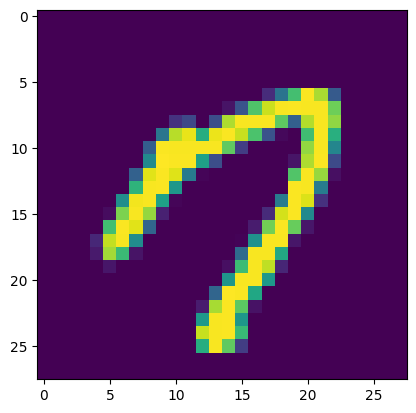

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(df.iloc[2][1:].values.reshape(28,28))

In [ ]:
# Création séparation des features / target
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(df[0])
X_train = df.drop([0], axis=1).values.reshape(-1,28,28)

y_test = to_categorical(df_validation[0])
X_test = df_validation.drop([0], axis=1).values.reshape(-1,28,28)
y_train.shape, X_train.shape

((20000, 10), (20000, 28, 28))

In [ ]:
# Conception d'un modèle de réseau de neuronne à convolution
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

# Conception d'un modèle de réseau de neuronne à convolution
my_model = Sequential()

my_model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28, 28, 1)))
my_model.add(MaxPooling2D(pool_size=(2,2)))

my_model.add(Conv2D(filters=16, kernel_size=(3,3)))
my_model.add(MaxPooling2D(pool_size=(2,2)))

my_model.add(Conv2D(filters=8, kernel_size=(3,3)))
my_model.add(MaxPooling2D(pool_size=(2,2)))

my_model.add(Flatten())

my_model.add(Dense(10, activation='softmax'))

# Compilation du modèle optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']


my_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Affichage de la structure du modèle

my_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 16)        4624      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 8)           1160      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 1, 1, 8)         

In [ ]:
# Entraînez le modèle en utilisant le générateur d'images
my_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
625/625 [==============================] - 7s 7ms/step - loss: 2.5623 - accuracy: 0.6014 - val_loss: 0.7936 - val_accuracy: 0.7990
Epoch 2/10
625/625 [==============================] - 4s 6ms/step - loss: 0.6581 - accuracy: 0.8253 - val_loss: 0.4714 - val_accuracy: 0.8667
Epoch 3/10
625/625 [==============================] - 3s 5ms/step - loss: 0.4223 - accuracy: 0.8820 - val_loss: 0.3794 - val_accuracy: 0.8866
Epoch 4/10
625/625 [==============================] - 5s 7ms/step - loss: 0.3084 - accuracy: 0.9087 - val_loss: 0.2980 - val_accuracy: 0.9120
Epoch 5/10
625/625 [==============================] - 4s 6ms/step - loss: 0.2527 - accuracy: 0.9235 - val_loss: 0.2263 - val_accuracy: 0.9341
Epoch 6/10
625/625 [==============================] - 4s 6ms/step - loss: 0.2134 - accuracy: 0.9365 - val_loss: 0.2338 - val_accuracy: 0.9327
Epoch 7/10
625/625 [==============================] - 5s 7ms/step - loss: 0.1930 - accuracy: 0.9427 - val_loss: 0.2418 - val_accuracy: 0.9290
Epoch 

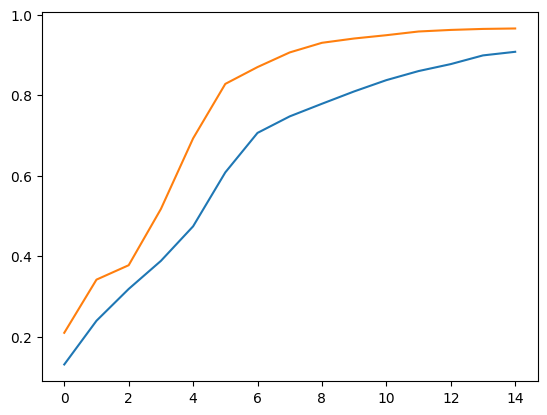

In [ ]:
# Graphique d'évolution de l'accuracy durant l'entraînement


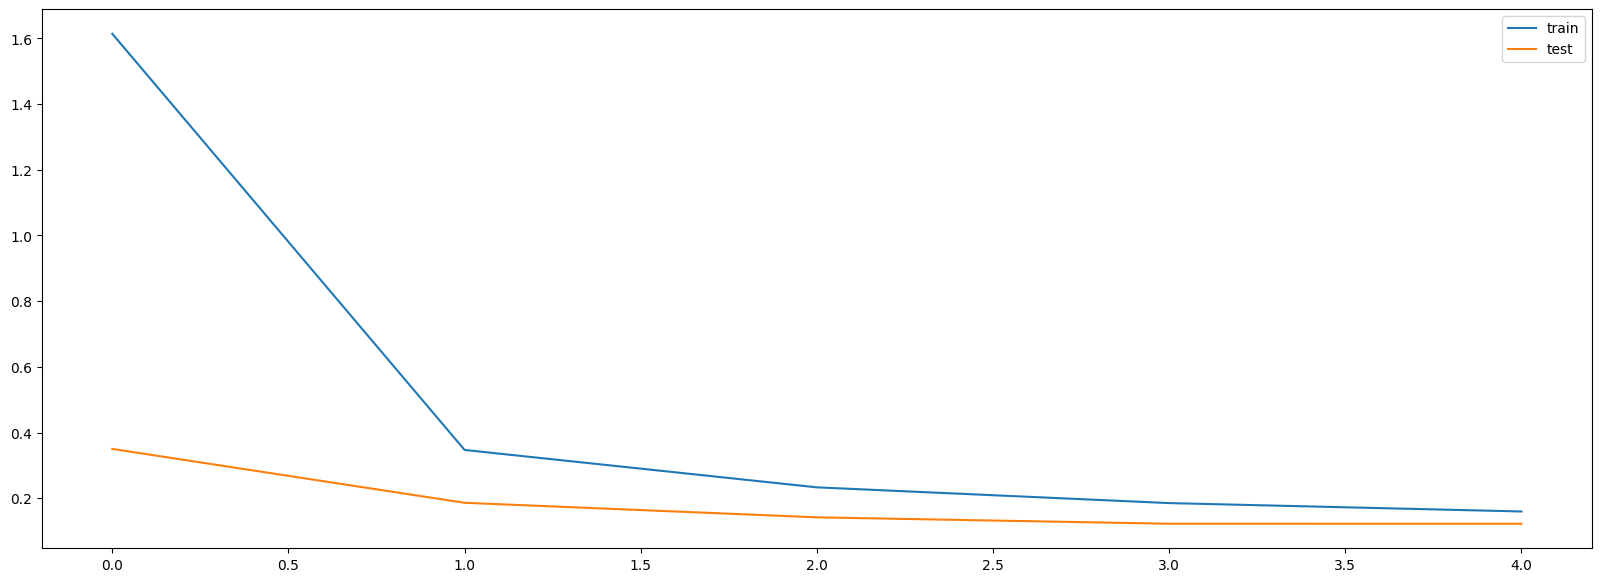

In [ ]:
# Graphique d'évolution de la loss durant l'entraînement
